# Libraries

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import scipy.stats

# Input dataset

In [2]:
train = pd.read_csv('../input/train.csv')

# Explorer datasete

In [3]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# Check null data

In [4]:
def missing_value_table(df):
  #欠損値がそのカラムにいくつあるかを出力する
  null_val = df.isnull().sum()
  #それぞれのカラムで欠損値がどのくらいの割合を占めているかを計算する
  percent = 100 * df.isnull().sum()/len(df)
  #pandasのconcatメソッドで欠損数とその割合をaxis=1方向に連結する
  missing_table = pd.concat([null_val, percent], axis=1)
  #pandas.DataFrameの行名・列名を変更する
  missing_table_ren_columns = missing_table.rename(
  columns = {0 : '欠損数', 1 : '%'})
  return missing_table_ren_columns

In [5]:
missing_value_table(train)

,欠損数,%
PassengerId,0,0.000000
Survived,0,0.000000
Pclass,0,0.000000
Name,0,0.000000
Sex,0,0.000000
Age,177,19.865320
SibSp,0,0.000000
Parch,0,0.000000
Ticket,0,0.000000
Fare,0,0.000000


# Replace null data to median or dropna

In [6]:
train.shape

(891, 12)

In [7]:
train = train.dropna(subset=['Age', 'Embarked'])

In [8]:
train.shape

(712, 12)

# Replace string data to number

In [9]:
#文字列を数値に変換する
train.loc[train['Sex'] == 'male', 'Sex'] = 0
train.loc[train['Sex'] == 'female', 'Sex'] = 1
train.loc[train['Embarked'] == 'S', 'Embarked'] = 0
train.loc[train['Embarked'] == 'C', 'Embarked'] = 1
train.loc[train['Embarked'] == 'Q', 'Embarked'] = 2

In [10]:
train.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000
mean,448.589888,0.404494,2.240169,0.363764,29.642093,0.514045,0.432584,34.567251,0.261236
std,258.683191,0.491139,0.836854,0.481420,14.492933,0.930692,0.854181,52.938648,0.521561
min,1.000000,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,222.750000,0.000000,1.000000,0.000000,20.000000,0.000000,0.000000,8.050000,0.000000
50%,445.000000,0.000000,2.000000,0.000000,28.000000,0.000000,0.000000,15.645850,0.000000
75%,677.250000,1.000000,3.000000,1.000000,38.000000,1.000000,1.000000,33.000000,0.000000
max,891.000000,1.000000,3.000000,1.000000,80.000000,5.000000,6.000000,512.329200,2.000000


# Linerity

In [11]:
train['Survived_z'] = train['Survived']
train.loc[train['Survived'] == 0, 'Survived_z'] = -1

In [12]:
train_z = train.loc[:, ['PassengerId', 
                        'Survived_z', 
                        'Pclass', 
                        'Sex', 
                        'Age', 
                        'SibSp', 
                        'Parch', 
                        'Fare', 
                        'Embarked']]
train_z = train_z.apply(scipy.stats.zscore, axis=0)

/usr/local/lib/python3.5/dist-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


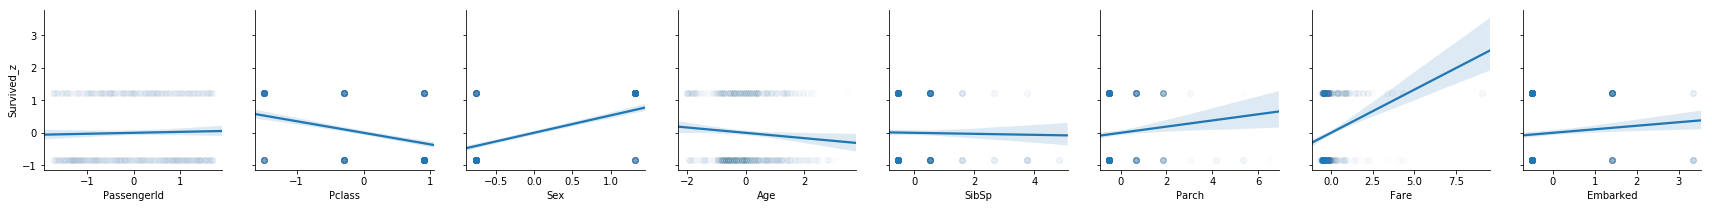

In [13]:
sns.pairplot(train_z, kind="reg", plot_kws={'scatter_kws': {'alpha': 0.01}}, size=3.0, 
             x_vars=['PassengerId', 
                     'Pclass', 
                     'Sex', 
                     'Age', 
                     'SibSp', 
                     'Parch', 
                     'Fare', 
                     'Embarked'],
             y_vars=['Survived_z'])

In [14]:
train_z_corr = train_z.corr()

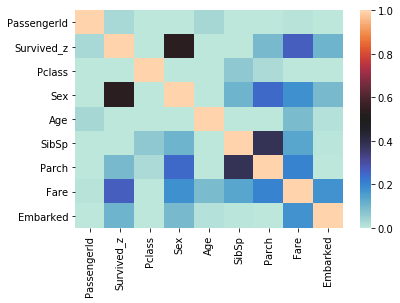

In [15]:
sns.heatmap(train_z_corr, vmax=1, vmin=0, center=0.5)

In [16]:
train_z_corr_list = abs(train_z_corr['Survived_z'])
train_z_corr_list

PassengerId    0.029526
Survived_z     1.000000
Pclass         0.356462
Sex            0.536762
Age            0.082446
SibSp          0.015523
Parch          0.095265
Fare           0.266100
Embarked       0.108517
Name: Survived_z, dtype: float64

In [17]:
train_z_corr_list_sorted = sorted(train_z_corr_list.items(), key=lambda x: -x[1])
train_z_corr_list_sorted

[('Survived_z', 1.0),
 ('Sex', 0.5367616233485071),
 ('Pclass', 0.35646158844523984),
 ('Fare', 0.2660996004765803),
 ('Embarked', 0.10851682255419708),
 ('Parch', 0.09526529428685354),
 ('Age', 0.08244586804341403),
 ('PassengerId', 0.029525626840186277),
 ('SibSp', 0.015523023631749415)]